###Importing Neccesary Libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

###Loading Dataset

In [2]:
data = pd.read_csv('/content/city_day.csv')


In [3]:
data.shape

(29531, 16)

###Exploratory Data Analysis

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

**Head and Tail values**

In [5]:
print("Head of the Dataset:")
print(data.head())

print("\nTail of the Dataset:")
print(data.tail())

Head of the Dataset:
        City        Date  PM2.5  PM10     NO    NO2    NOx  NH3     CO    SO2  \
0  Ahmedabad  2015-01-01    NaN   NaN   0.92  18.22  17.15  NaN   0.92  27.64   
1  Ahmedabad  2015-01-02    NaN   NaN   0.97  15.69  16.46  NaN   0.97  24.55   
2  Ahmedabad  2015-01-03    NaN   NaN  17.40  19.30  29.70  NaN  17.40  29.07   
3  Ahmedabad  2015-01-04    NaN   NaN   1.70  18.48  17.97  NaN   1.70  18.59   
4  Ahmedabad  2015-01-05    NaN   NaN  22.10  21.42  37.76  NaN  22.10  39.33   

       O3  Benzene  Toluene  Xylene  AQI AQI_Bucket  
0  133.36     0.00     0.02    0.00  NaN        NaN  
1   34.06     3.68     5.50    3.77  NaN        NaN  
2   30.70     6.80    16.40    2.25  NaN        NaN  
3   36.08     4.43    10.14    1.00  NaN        NaN  
4   39.31     7.01    18.89    2.78  NaN        NaN  

Tail of the Dataset:
                City        Date  PM2.5   PM10    NO    NO2    NOx    NH3  \
29526  Visakhapatnam  2020-06-27  15.02  50.94  7.68  25.06  19.54  1

**Basic Information of Entire Dataset**

In [6]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB
None


**Summary Statistics of the Dataset**

In [7]:
print(data.describe())

              PM2.5          PM10            NO           NO2           NOx  \
count  24933.000000  18391.000000  25949.000000  25946.000000  25346.000000   
mean      67.450578    118.127103     17.574730     28.560659     32.309123   
std       64.661449     90.605110     22.785846     24.474746     31.646011   
min        0.040000      0.010000      0.020000      0.010000      0.000000   
25%       28.820000     56.255000      5.630000     11.750000     12.820000   
50%       48.570000     95.680000      9.890000     21.690000     23.520000   
75%       80.590000    149.745000     19.950000     37.620000     40.127500   
max      949.990000   1000.000000    390.680000    362.210000    467.630000   

                NH3            CO           SO2            O3       Benzene  \
count  19203.000000  27472.000000  25677.000000  25509.000000  23908.000000   
mean      23.483476      2.248598     14.531977     34.491430      3.280840   
std       25.684275      6.962884     18.133775    

**Missing Values**

The dataset has a lot of missing values which we will handle further in our solution.
Here we have printed those missing values.

In [8]:
print("Missing values:")
print(data.isnull().sum())

Missing values:
City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64


**Dividing the Columns based on the types of Features**

We need to separate the features into numerical and categorical features for further analysis and our solution.

In [9]:
numerical_features = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI']
categorical_features = ['City']

**Describing numerical features**

In [10]:
print("Description of numerical features:")
print(data[numerical_features].describe())

Description of numerical features:
              PM2.5          PM10            NO           NO2           NOx  \
count  24933.000000  18391.000000  25949.000000  25946.000000  25346.000000   
mean      67.450578    118.127103     17.574730     28.560659     32.309123   
std       64.661449     90.605110     22.785846     24.474746     31.646011   
min        0.040000      0.010000      0.020000      0.010000      0.000000   
25%       28.820000     56.255000      5.630000     11.750000     12.820000   
50%       48.570000     95.680000      9.890000     21.690000     23.520000   
75%       80.590000    149.745000     19.950000     37.620000     40.127500   
max      949.990000   1000.000000    390.680000    362.210000    467.630000   

                NH3            CO           SO2            O3       Benzene  \
count  19203.000000  27472.000000  25677.000000  25509.000000  23908.000000   
mean      23.483476      2.248598     14.531977     34.491430      3.280840   
std       25.684

**Coorealation Heatmap of Numerical Features**

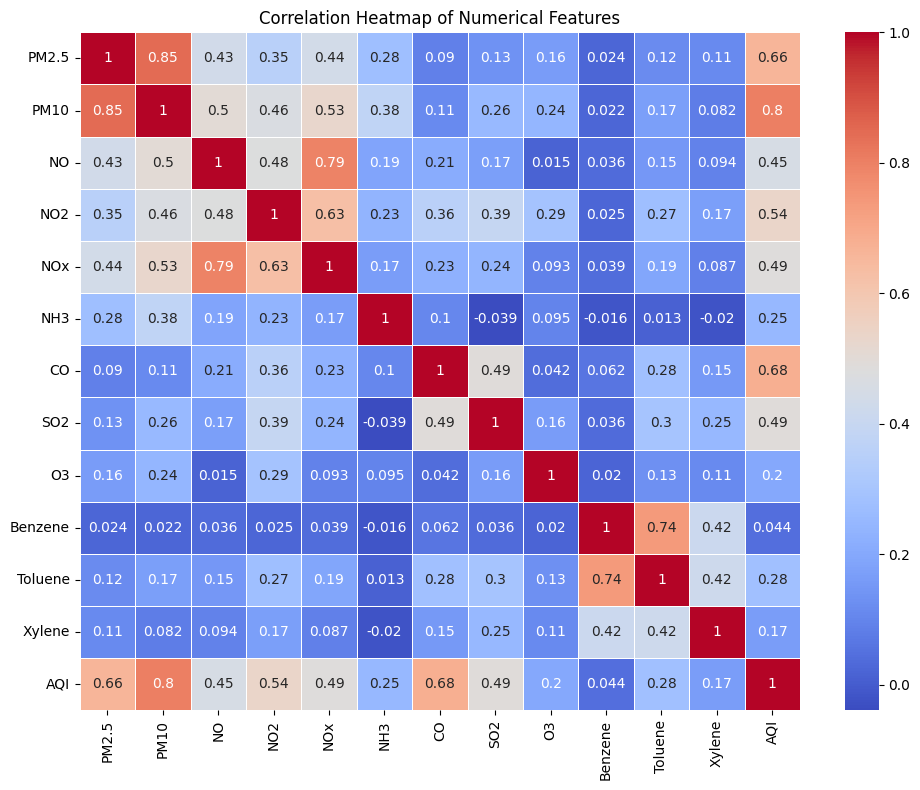

In [11]:
plt.figure(figsize=(10, 8))
sns.heatmap(data[numerical_features].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.tight_layout()
plt.show()
plt.close()

**Histogram of Numerical Features**

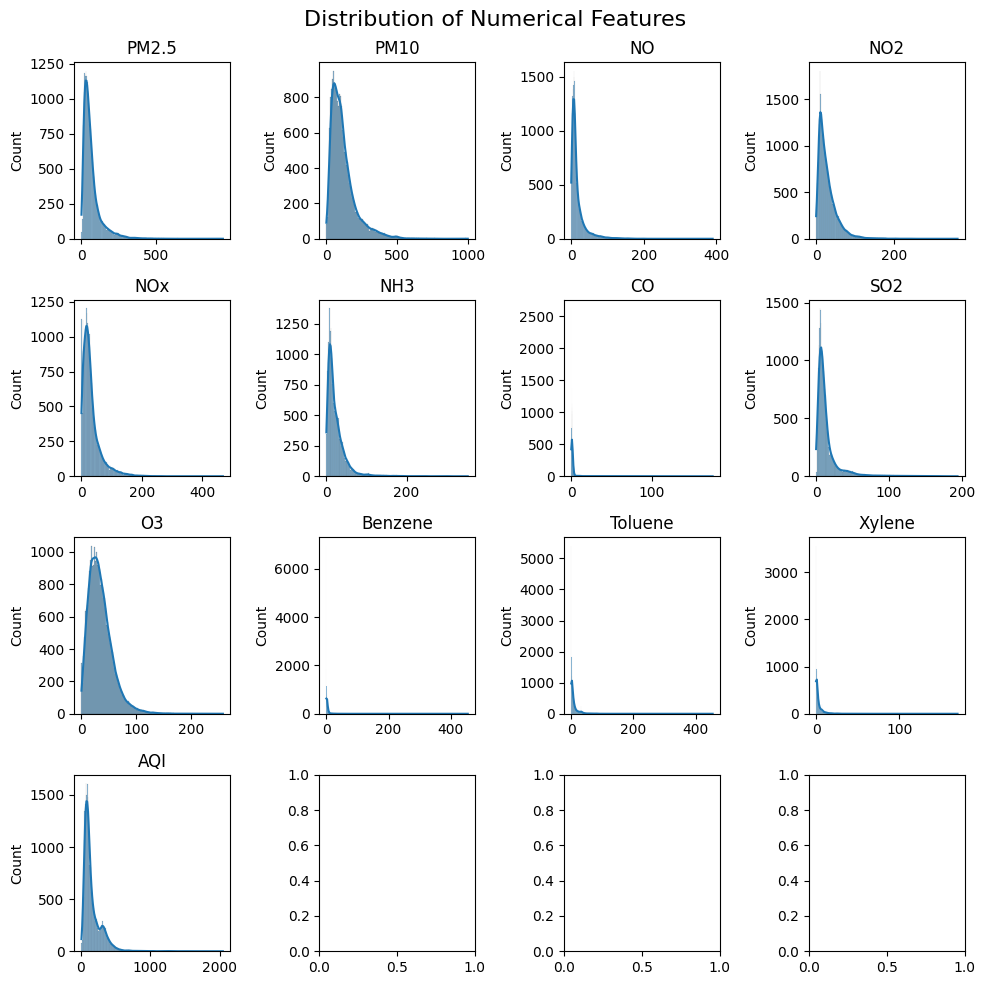

In [12]:
fig, axes = plt.subplots(4, 4, figsize=(10,10))
fig.suptitle('Distribution of Numerical Features', fontsize=16)

for i, feature in enumerate(numerical_features):
    row = i // 4
    col = i % 4
    if feature in data.columns:
        sns.histplot(data[feature].dropna(), kde=True, ax=axes[row, col])
        axes[row, col].set_title(feature)
        axes[row, col].set_xlabel('')
    else:
        axes[row, col].set_visible(False)

plt.tight_layout()
plt.show()
plt.close()

### Creating Column Transformer for Data Preprocessing



**1.** **Feature Identification**:
   - **Numerical Features**: Includes air quality indicators like `PM2.5`, `PM10`, `NO`, etc.
   - **Categorical Feature**: The `City` column.

In [13]:
numerical_features = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']
categorical_features = ['City']

**2.** **Data Cleaning**:
   - Removed rows where only the `City` data is present and all other columns are null, ensuring meaningful data for analysis.

In [14]:
data = data.dropna(subset=['AQI'])

#removing the rows in which only city data is available other columns are null
columns_to_check = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket']
data = data.dropna(subset=columns_to_check, how='all')


**3.** **Numerical Data Preprocessing**:
   - **Imputation**: Fill missing values with the mean.
   - **Scaling**: Standardize numerical features.

In [15]:
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

**4.** **Categorical Data Preprocessing**:
   - **One-Hot Encoding**: Convert the `City` column into a numerical format.

In [16]:
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical variables
])

**5.** **Combined Preprocessing**:
   - Applied specific preprocessing steps to numerical and categorical features using `ColumnTransformer`.

In [17]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

### Creating the Pipeline



**1.** **Pipeline Definition**:
   - **Preprocessor**: Applies the previously defined `ColumnTransformer` to preprocess the data, handling both numerical and categorical features.
   - **Regressor**: Uses `RandomForestRegressor` as the model for predicting air quality indices. The `random_state=42` ensures reproducibility of results.

**2.** **Pipeline Creation**:
   - The `Pipeline` object is created with two main steps:
     - **Preprocessing**: Applies data transformations.
     - **Modeling**: Fits a RandomForest model on the preprocessed data.


In [18]:
# Create the pipeline
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
  ('regressor', RandomForestRegressor(random_state=42))
])


###Spliting the data

In [19]:
X = data.drop(['AQI', 'AQI_Bucket', 'Date'], axis=1)
y = data['AQI']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Traning the model

### Random Forest Regressor :

**A machine learning pipeline for predicting air quality
using a Random Forest Regressor model.**

The pipeline consists of two main steps:

1. Preprocessing:
   - Numerical Features: Imputes missing values with the mean and scales
     the features using StandardScaler.
   - Categorical Features: Applies one-hot encoding to handle categorical
     variables.

2. Regressor:
   - Uses a Random Forest Regressor model with a random state of 42 for
     reproducibility.

Performance:
* Mean Absolute Error (MAE): 20.416562430934817
* Mean Squared Error (MSE): 1633.8408395732197
* R-Squared (R2): 0.9107728168101734

The pipeline combines these steps to streamline the process of data
preprocessing and model training.


In [20]:
model_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['PM2.5', 'PM10', 'NO', 'NO2',
                                                   'NOx', 'NH3', 'CO', 'SO2',
                                                   'O3', 'Benzene', 'Toluene',
                                                   'Xylene']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['City'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

In [21]:
y_pred = model_pipeline.predict(X_test)

In [22]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-Squared (R2):", r2)


Mean Absolute Error (MAE): 20.416562430934817
Mean Squared Error (MSE): 1633.8408395732197
R-Squared (R2): 0.9107728168101734


In [23]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

### Linear Regression:

Performance:

*   MAE: 30.29
*   MSE: 3224.69
*   R2 Score: 0.8238

**Linear Regression performed better than SVR but still lagged behind the Random Forest and XGBoost models. It shows a decent fit with an R2 score above 0.8, but the error metrics are higher than desired.**

In [24]:
# Linear Regression
linear_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

print("Linear Regression:")
print("MAE:", mean_absolute_error(y_test, y_pred_linear))
print("MSE:", mean_squared_error(y_test, y_pred_linear))
print("R2:", r2_score(y_test, y_pred_linear))

Linear Regression:
MAE: 30.288530626333564
MSE: 3224.6901389798168
R2: 0.8238934841190906


### Ridge Regression:

Alpha: 1.0 (default)

Performance:
*  MAE: 30.29
*  MSE: 3224.71
*  R2 Score: 0.8238

**Ridge Regression, a regularized form of Linear Regression, provided results almost identical to Linear Regression, which indicates that regularization did not significantly affect the model's performance.**

In [25]:
# Ridge Regression
ridge_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Ridge(alpha=1.0))
])
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

print("\nRidge Regression:")
print("MAE:", mean_absolute_error(y_test, y_pred_ridge))
print("MSE:", mean_squared_error(y_test, y_pred_ridge))
print("R2:", r2_score(y_test, y_pred_ridge))


Ridge Regression:
MAE: 30.287601900115384
MSE: 3224.718610757806
R2: 0.8238919292206643


### Lasso Regression:

Alpha: 0.01

Performance:
*  MAE: 30.09
*  MSE: 3423.28
*  R2 Score: 0.8130

**Lasso Regression, another regularized regression model, slightly improved the Mean Absolute Error (MAE) but had a higher Mean Squared Error (MSE) compared to Ridge Regression and Linear Regression. The R2 score shows a slight decrease.**

In [26]:
# Lasso Regression
lasso_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Lasso(alpha=1.0))
])
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)
print("\nLasso Regression:")
print("MAE:", mean_absolute_error(y_test, y_pred_lasso))
print("MSE:", mean_squared_error(y_test, y_pred_lasso))
print("R2:", r2_score(y_test, y_pred_lasso))


Lasso Regression:
MAE: 30.986955359782247
MSE: 3423.276906204575
R2: 0.813048279721539


### Support Vector Regression (SVR):

Kernel: Radial Basis Function (RBF)

Performance:
*   MAE: 33.39
*   MSE: 6230.19
*   R2 Score: 0.6597

**The SVR model didn't perform as well as the Random Forest or XGBoost models. The R2 score indicates a moderate fit, but the errors (MAE and MSE) are relatively high.**

In [27]:
# Support Vector Regression
svr_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', SVR(kernel='rbf'))
])
svr_model.fit(X_train, y_train)
y_pred_svr = svr_model.predict(X_test)

print("\nSupport Vector Regression:")
print("MAE:", mean_absolute_error(y_test, y_pred_svr))
print("MSE:", mean_squared_error(y_test, y_pred_svr))
print("R2:", r2_score(y_test, y_pred_svr))


Support Vector Regression:
MAE: 33.38941563601114
MSE: 6230.191003088866
R2: 0.6597573151094518


### XGBoost Regression

Performance Metrics:

*  Mean Absolute Error (MAE): 21.48
*  Mean Squared Error (MSE): 1835.34
*  R-Squared (R²): 0.8998

**XGBoost achieved a strong R² score of 0.8998, indicating that around 90% of the variance in the target variable is explained by the model. The relatively low MAE and MSE values demonstrate its effectiveness in minimizing prediction errors compared to other models.**

In [28]:
from xgboost import XGBRegressor

# XGBoost Regression
xgb_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor(random_state=42))
])
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

print("\nXGBoost Regression:")
print("MAE:", mean_absolute_error(y_test, y_pred_xgb))
print("MSE:", mean_squared_error(y_test, y_pred_xgb))
print("R2:", r2_score(y_test, y_pred_xgb))



XGBoost Regression:
MAE: 21.47748456471403
MSE: 1835.3435811047777
R2: 0.8997683654606863


### Random Forest Regressor (hyperparameter tuning)


**Hyperparameter Tuning and Feature Selection**

This section focuses on optimizing the Random Forest Regressor model through hyperparameter tuning and feature selection.

**Hyperparameter Tuning:**
- **GridSearchCV:** A systematic search is performed over a predefined set of hyperparameters ('n_estimators' and 'min_samples_split') using GridSearchCV.
- **Cross-Validation:** The model is evaluated using 5-fold cross-validation (cv=5) to ensure robust performance estimation.
- **Evaluation Metric:** The 'neg_mean_squared_error' is used as the scoring metric, aiming to minimize the mean squared error.
- **Best Model Selection:** The model with the best hyperparameters based on the cross-validation scores is identified.

Interestingly, the default hyperparameters of the Random Forest Regressor already provided a good level of accuracy. The hyperparameter tuning process did not yield significant improvements in model performance. This suggests that the default settings are well-suited for this particular dataset and problem.



In [29]:
param_grid = {
    'regressor__n_estimators': [50, 100, 200],
    'regressor__min_samples_split': [2, 5, 10]
}

# Hyperparameter Tuning using GridSearchCV
grid_search = GridSearchCV(model_pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

print("\nImproved Random Forest Regression:")
print("MAE:", mean_absolute_error(y_test, y_pred_best))
print("MSE:", mean_squared_error(y_test, y_pred_best))
print("R2:", r2_score(y_test, y_pred_best))

Best Hyperparameters: {'regressor__min_samples_split': 10, 'regressor__n_estimators': 200}

Improved Random Forest Regression:
MAE: 20.37649987765583
MSE: 1653.05118843797
R2: 0.9097237027987111


##Final Conclusion

**Thus we see that Random Forest Regressor (Default Parameters) is the best approach for Predicting Air Quality on the given Data**